Importación de las librerias necesarias

In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Importación y visualización de los datos

In [348]:
dataset = pd.read_csv("heart.csv")
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Visualización gráfica de los datos

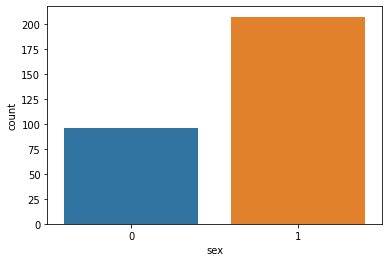

In [509]:
x = (dataset.sex.value_counts())
chart = sns.countplot(data = dataset, x="sex")
plt.show()

<Figure size 720x720 with 0 Axes>

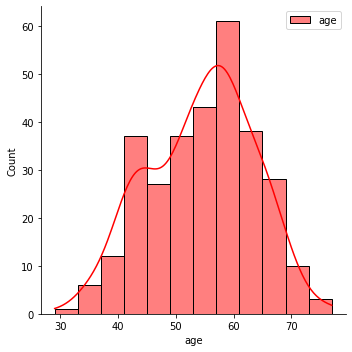

In [512]:
plt.figure(figsize=(10,10))
sns.displot(dataset.age, color="red", label="age", kde= True)
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


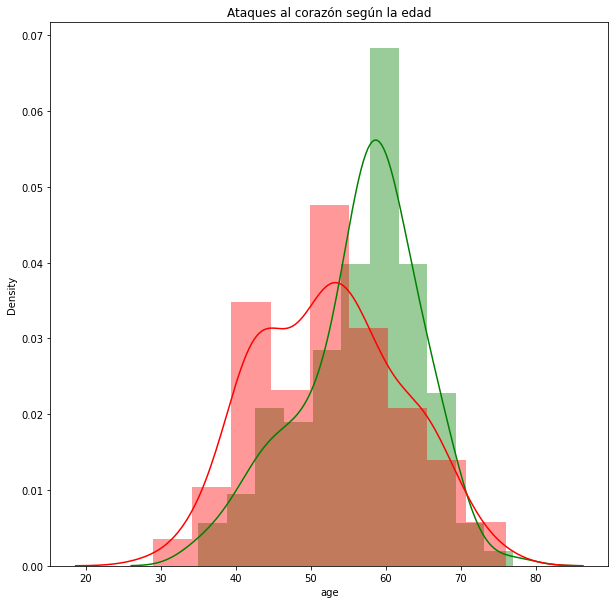

In [513]:
plt.figure(figsize=(10,10))
sns.distplot(dataset[dataset['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(dataset[dataset['output'] == 1]["age"], color='red',kde=True)
plt.title('Ataques al corazón según la edad')
plt.show()

Selección y procesamiento de los datos

In [475]:
X = dataset.iloc[:,0:13]
Y = dataset.iloc[:,-1]

In [494]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

In [495]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Clasificación y predición usando KNeighbors

In [522]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [523]:
prediction = classifier.predict(x_test)

In [524]:
accuracy_score(y_test, prediction)

0.8360655737704918

In [525]:
recall_score(y_test, prediction)

0.8529411764705882

In [526]:
f1_score(y_test, prediction)

0.8529411764705882

In [527]:
roc_auc_score(y_test, prediction)

0.8338779956427016

In [528]:
recall_score(y_test, prediction)

0.8529411764705882

In [529]:
cm = confusion_matrix(y_test, prediction)
cm

array([[22,  5],
       [ 5, 29]])